In [4]:
# Definir les chemins des dossiers de donnes
train_emotion = "./data/train"
test_emotion = "./data/test"

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2
import os
import matplotlib.pyplot as plt
import numpy

In [5]:
# Verifier les dimensions des l'images
img_path = "./data/train/happy/im0.png"
img = tf.keras.preprocessing.image.load_img(img_path)
img_array = tf.keras.preprocessing.image.img_to_array(img)
print("Dimensions de l'image :", img_array.shape)

Dimensions de l'image : (48, 48, 3)


In [6]:
# Charger train dataset d'images
train_im = tf.keras.utils.image_dataset_from_directory(
    train_emotion,
    image_size=(48, 48),
    batch_size=32
)
class_names = train_im.class_names
print("Classes detectees :", class_names)

Found 28709 files belonging to 7 classes.
Classes detectees : ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


In [7]:
# Charger test dataset d'images
test_im = tf.keras.utils.image_dataset_from_directory(
    test_emotion,
    image_size=(48,48),
    batch_size=32
)
class_names = test_im.class_names
print("Classes detectees :", class_names)

Found 7178 files belonging to 7 classes.
Classes detectees : ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


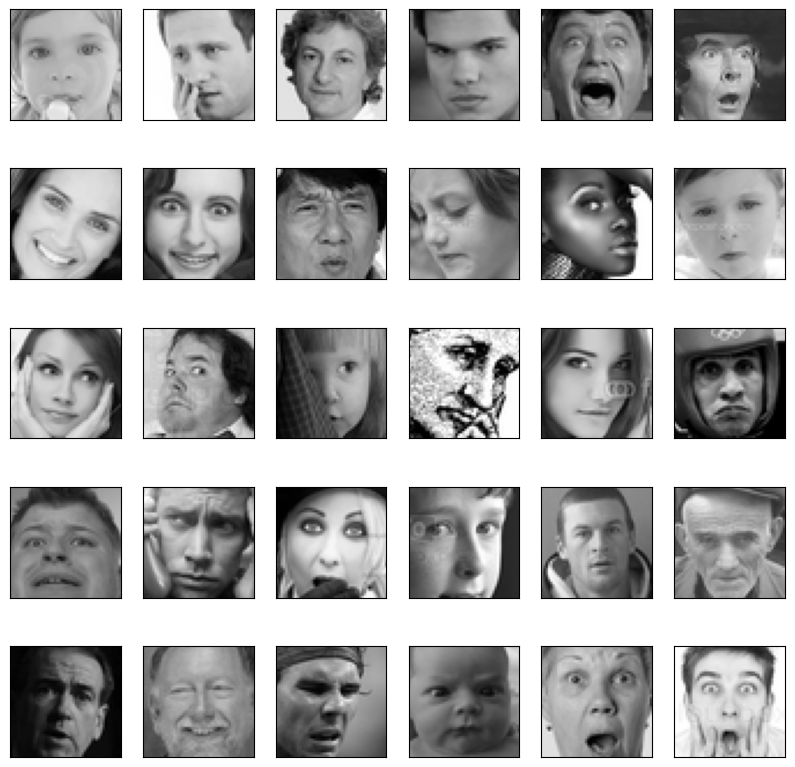

In [8]:
# visualisation des images 
for images, labels in train_im.take(1):
    plt.figure(figsize=(10,10))
    for i in range(30):
        plt.subplot(5,6,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.xticks([])
        plt.yticks([])
    plt.show()

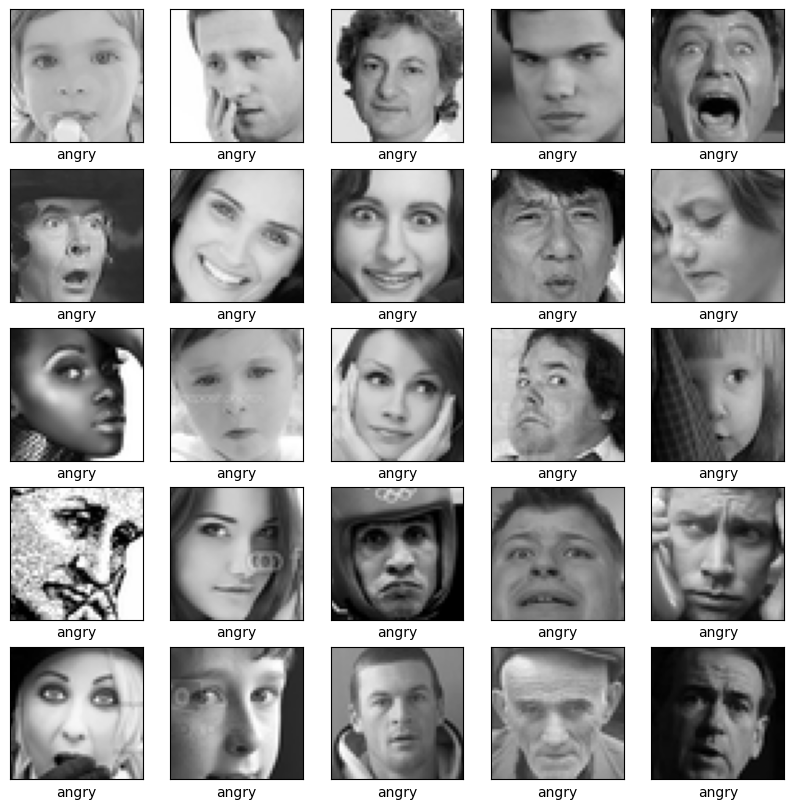

In [9]:
# donner une categorie pour chaque image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i].numpy().astype("uint8"))
    label_index = labels[i].numpy().argmax()
    plt.xlabel(class_names[label_index])
plt.show()

In [10]:
# Creation d’un modele de reseau de neurones
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(48,48,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPool2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu', name='layer1'),
    layers.Dense(7, activation='softmax', name='layer2')
    ])
model.summary()

c:\Users\hp\Desktop\D-tection-d-motions-Faciales\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,623 (3.20 MB)

 Trainable params: 839,623 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Compilation du modèle
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [41]:
#  entrainement du modele
model.fit(train_im, epochs=10, validation_data=test_im)

Epoch 1/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.4964 - loss: 1.3152 - val_accuracy: 0.4067 - val_loss: 1.7146
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 30ms/step - accuracy: 0.5422 - loss: 1.2223 - val_accuracy: 0.3950 - val_loss: 1.7110
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.5785 - loss: 1.1340 - val_accuracy: 0.3998 - val_loss: 1.9081
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 28s 31ms/step - accuracy: 0.6117 - loss: 1.0536 - val_accuracy: 0.4014 - val_loss: 1.9219
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.6479 - loss: 0.9622 - val_accuracy: 0.3919 - val_loss: 2.3742
Epoch 6/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 26s 29ms/step - accuracy: 0.6797 - loss: 0.8806 - val_accuracy: 0.3966 - val_loss: 2.4651
Epoch 7/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.7099 - loss: 0.8070 - val_accuracy: 0.4014 - val_loss: 2.4837
Epoch 8/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 25s 28ms/step - accuracy: 0.7368 - loss: 0.7318 - 

In [ ]:
# Calculer la précision finale
test_loss, test_acc = model.evaluate(test_im)
print("accuracy :", test_acc)

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.3862 - loss: 3.4629
accuracy : 0.38617998361587524


In [15]:
# sauvgarde du modele
model.save("emotion_cnn_model.keras")